# Data Pre Processing 

In [46]:
import pandas as pd

In [47]:
#read data from data set 
data1 = pd.read_csv("DataSets/col_mat_nuw_output.csv",header = None)
data2 = pd.read_csv("DataSets/kan_output.csv", header=None)
data3 = pd.read_csv("DataSets/mon_kur_jaf_output.csv", header=None)
data = pd.concat([data1,data2,data3])
data.shape

(12782, 4)

In [48]:
data.columns = ["HCHO reading", "Location", "Current Date", "Next Date"]

In [49]:
data

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
5473,NaN,Jaffna Proper,2023-12-27,2023-12-28
5474,0.000051,Jaffna Proper,2023-12-28,2023-12-29
5475,0.000127,Jaffna Proper,2023-12-29,2023-12-30
5476,0.000117,Jaffna Proper,2023-12-30,2023-12-31


In [50]:
colombo_df = data[data['Location'] == "Colombo Proper"]
colombo_df

,HCHO reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06
...,...,...,...,...
1821,0.000118,Colombo Proper,2023-12-27,2023-12-28
1822,NaN,Colombo Proper,2023-12-28,2023-12-29
1823,NaN,Colombo Proper,2023-12-29,2023-12-30
1824,0.000140,Colombo Proper,2023-12-30,2023-12-31


In [51]:
colombo_df.isnull().sum()

HCHO reading    487
Location          0
Current Date      0
Next Date         0
dtype: int64

In [52]:
#Filling null values using mode method
colombo_df_mode_value = colombo_df['HCHO reading'].mode()[0]
colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)

C:\Users\ASUS TUF\AppData\Local\Temp\ipykernel_26740\3925198408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  colombo_df['HCHO reading'].fillna(colombo_df_mode_value, inplace=True)


In [53]:
colombo_df.isnull().sum()

HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

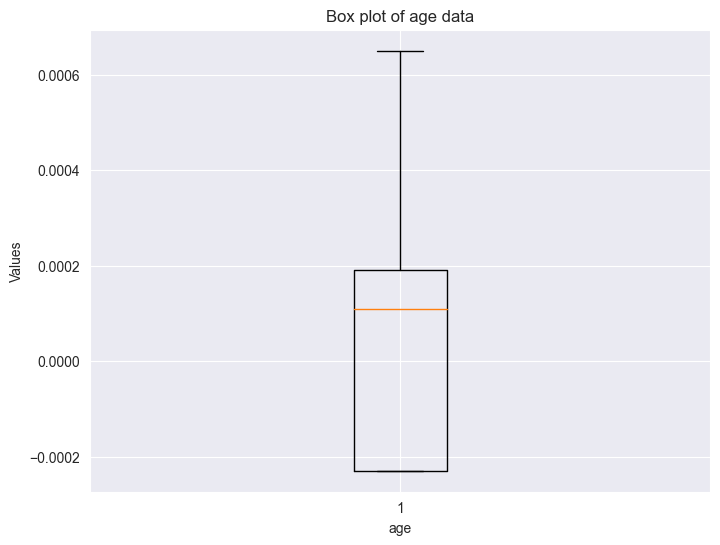

In [54]:
import matplotlib.pyplot as plt
# Create a box plot for age feature
plt.figure(figsize=(8, 6))
plt.boxplot(colombo_df['HCHO reading'])
plt.title('Box plot of age data')
plt.xlabel('age')
plt.ylabel('Values')
plt.show()

In [55]:
colombo_df["Current Date"].duplicated().sum()

0

In [56]:
colombo_df["Next Date"].duplicated().sum()

0

In [57]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [58]:
result = adfuller(colombo_df['HCHO reading'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.470289
p-value: 0.000000
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [58]:
#Making stationary colombo_df
